<a href="https://colab.research.google.com/github/Shubham-2405/codeclause-june2023/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Clause Data Science Internship - June 2023

### Task - 1 Loan Prediction

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [ ]:
#importing the dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.set_index('Loan_ID', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
# finding missing values, unique catagories and value counts etc

def cat_to_num(data,x):
  missing=data[x].isnull().sum()
  unique_cnt=data[x].nunique()
  unique_cat=list(data[x].unique())

  f1=pd.DataFrame(data[x].value_counts(dropna=False))
  f1.rename(columns={x:"Count"},inplace=True)
  f2=pd.DataFrame(data[x].value_counts(normalize=True))
  f2.rename(columns={x:"Percentage"},inplace=True)
  f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
  ff=pd.concat([f1,f2],axis=1)

  print(f"Total missing values : {missing}\n")
  print(f"Total count of unique category : {unique_cnt}\n")
  print(f"Unique categories : \n{unique_cat}")
  print(f"Value count and % : \n{ff}")

  sns.countplot(data=data,x=x)
  plt.show()

Total missing values : 13

Total count of unique category : 2

Unique categories : 
['Male', 'Female', nan]
Value count and % : 
        Count Percentage
Male      489    81.36 %
Female    112    18.64 %
NaN        13        NaN


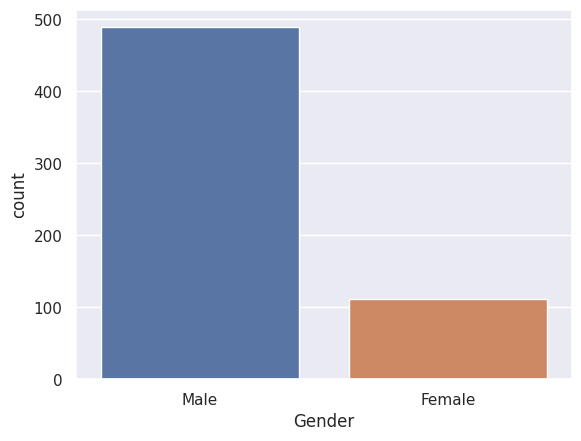

In [ ]:
cat_to_num(df,'Gender')

In [ ]:
# changing gender to numerical variable

df['Gender'] = df['Gender'].replace(['Male', 'Female'],[1,0])

Total missing values : 3

Total count of unique category : 2

Unique categories : 
['No', 'Yes', nan]
Value count and % : 
     Count Percentage
Yes    398    65.14 %
No     213    34.86 %
NaN      3        NaN


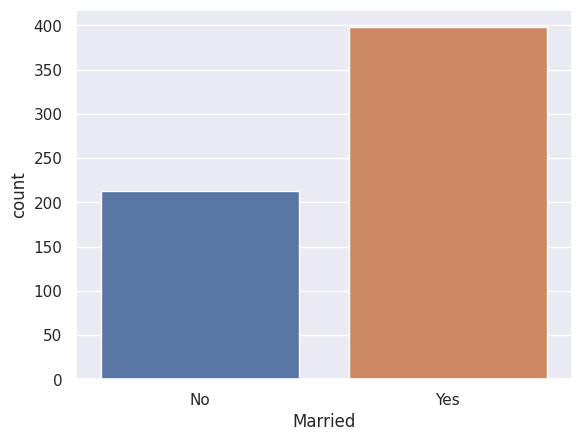

In [ ]:
cat_to_num(df,'Married')

In [ ]:
# changing married to numerical variable

df['Married'] = df['Married'].replace(['Yes', 'No'],[1,0])

Total missing values : 15

Total count of unique category : 4

Unique categories : 
['0', '1', '2', '3+', nan]
Value count and % : 
     Count Percentage
0      345     57.6 %
1      102    17.03 %
2      101    16.86 %
3+      51     8.51 %
NaN     15        NaN


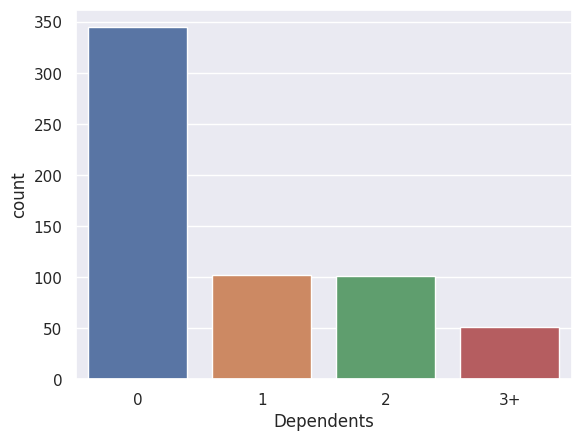

In [ ]:
cat_to_num(df,'Dependents')

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 3)

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Graduate', 'Not Graduate']
Value count and % : 
              Count Percentage
Graduate        480    78.18 %
Not Graduate    134    21.82 %


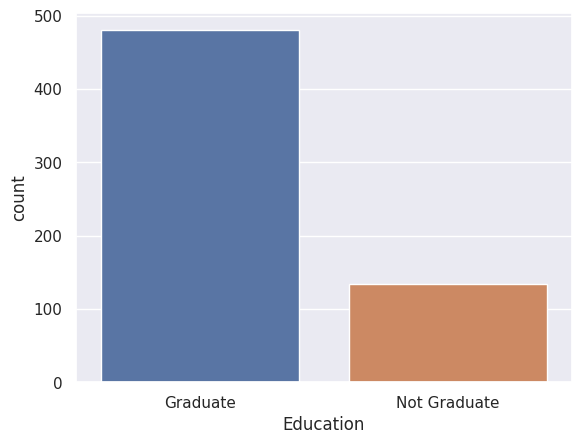

In [ ]:
cat_to_num(df,'Education')

In [ ]:
df['Education'] = df['Education'].replace(['Graduate', 'Not Graduate'],[1,0])

Total missing values : 32

Total count of unique category : 2

Unique categories : 
['No', 'Yes', nan]
Value count and % : 
     Count Percentage
No     500    85.91 %
Yes     82    14.09 %
NaN     32        NaN


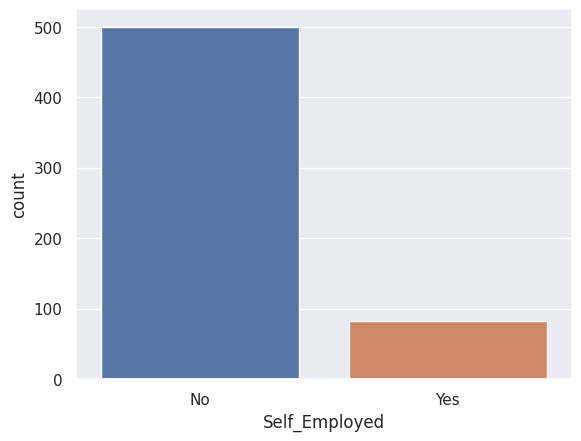

In [ ]:
cat_to_num(df,'Self_Employed')

In [ ]:
df['Self_Employed'] = df['Self_Employed'].replace(['Yes', 'No'],[1,0])

Total missing values : 0

Total count of unique category : 3

Unique categories : 
['Urban', 'Rural', 'Semiurban']
Value count and % : 
           Count Percentage
Semiurban    233    37.95 %
Urban        202     32.9 %
Rural        179    29.15 %


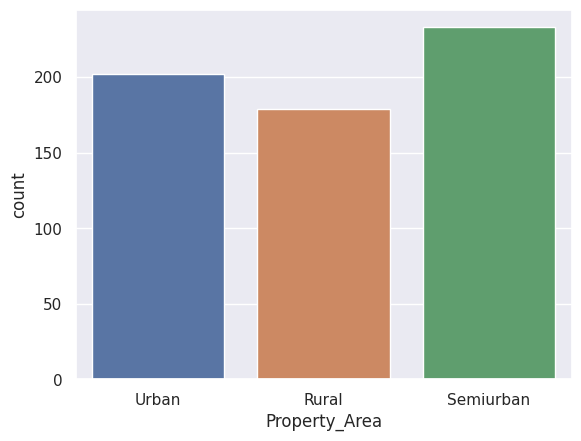

In [ ]:
cat_to_num(df,'Property_Area')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Y', 'N']
Value count and % : 
   Count Percentage
Y    422    68.73 %
N    192    31.27 %


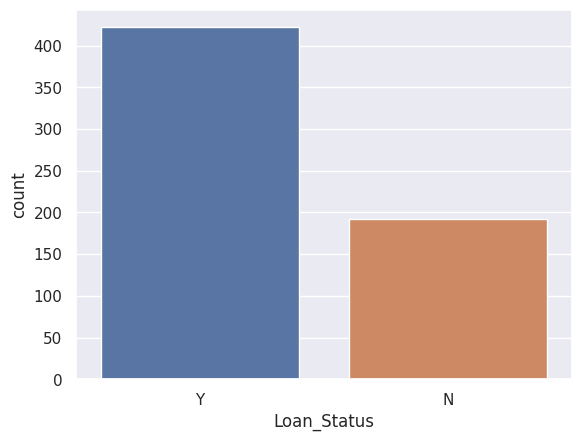

In [ ]:
cat_to_num(df, 'Loan_Status')

In [ ]:
df['Loan_Status'] = df['Loan_Status'].replace(['Y', 'N'],[1,0])

Total missing values : 50

Total count of unique category : 2

Unique categories : 
[1.0, 0.0, nan]
Value count and % : 
     Count Percentage
1.0    475    84.22 %
0.0     89    15.78 %
NaN     50        NaN


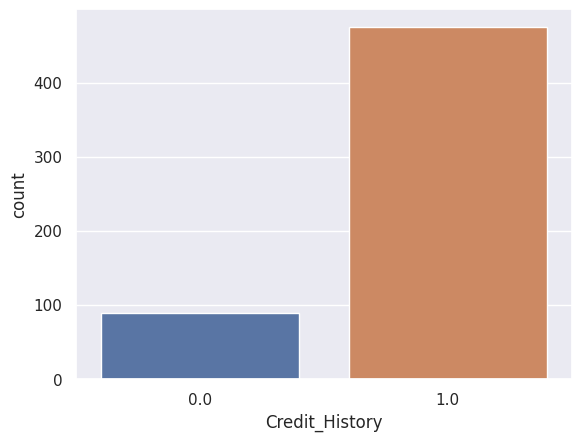

In [ ]:
cat_to_num(df, 'Credit_History')

In [ ]:
# Handling Numerical Values

def details_num(data,x):
  missing=data[x].isnull().sum()
  min1=round(data[x].min(),2)
  max1=round(data[x].max(),2)
  mean=round(data[x].mean(),2)
  var=round(data[x].var(),2)
  std=round(data[x].std(),2)
  range1=round(max1-min1,2)
  q1=round(data[x].quantile(.25),2)
  q2=round(data[x].quantile(.50),2)
  q3=round(data[x].quantile(.75),2)
  skew=round(data[x].skew(),2)
  kurt=round(data[x].kurt(),2)
  myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1, "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
  sns.histplot(data[x])
  plt.show()
  sns.boxplot(data=data,y=data[x])
  plt.show()
  return myvalue

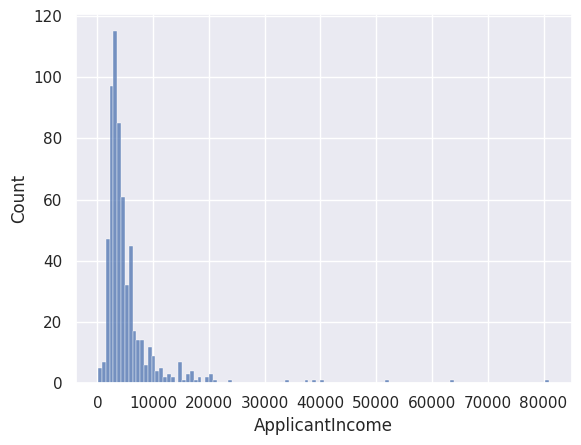

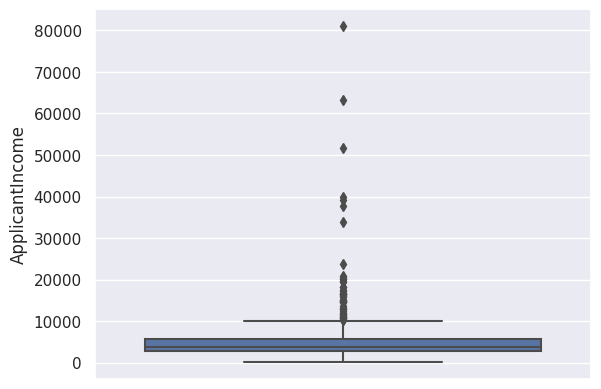

{'missing': 0,
 'min': 150,
 'max': 81000,
 'mean': 5403.46,
 'var': 37320390.17,
 'std': 6109.04,
 'range': 80850,
 'q1': 2877.5,
 'q2': 3812.5,
 'q3': 5795.0,
 'skewness': 6.54,
 'Kurtosis': 60.54}

In [ ]:
details_num(df, 'ApplicantIncome')

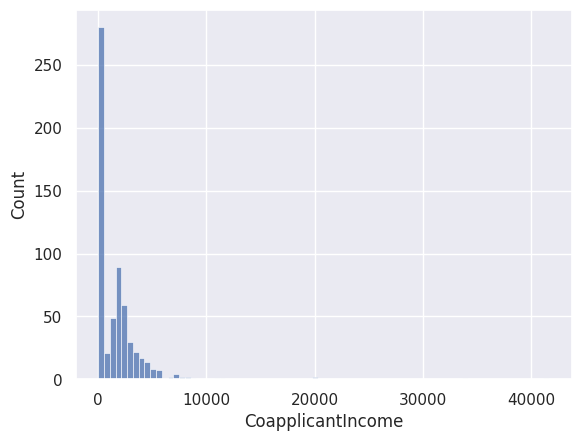

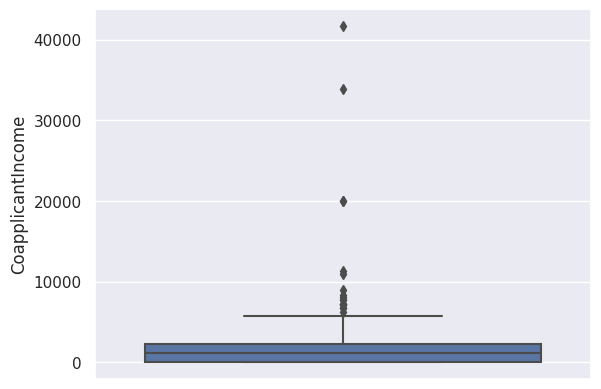

{'missing': 0,
 'min': 0.0,
 'max': 41667.0,
 'mean': 1621.25,
 'var': 8562929.52,
 'std': 2926.25,
 'range': 41667.0,
 'q1': 0.0,
 'q2': 1188.5,
 'q3': 2297.25,
 'skewness': 7.49,
 'Kurtosis': 84.96}

In [ ]:
details_num(df, 'CoapplicantIncome')

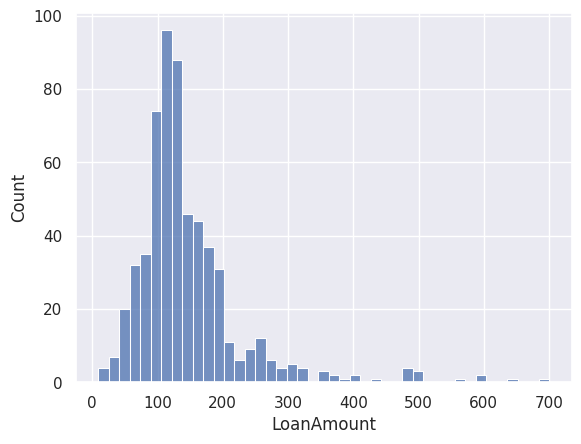

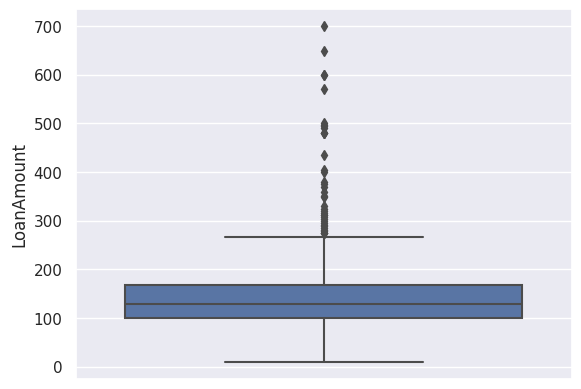

{'missing': 22,
 'min': 9.0,
 'max': 700.0,
 'mean': 146.41,
 'var': 7325.19,
 'std': 85.59,
 'range': 691.0,
 'q1': 100.0,
 'q2': 128.0,
 'q3': 168.0,
 'skewness': 2.68,
 'Kurtosis': 10.4}

In [ ]:
details_num(df, 'LoanAmount')

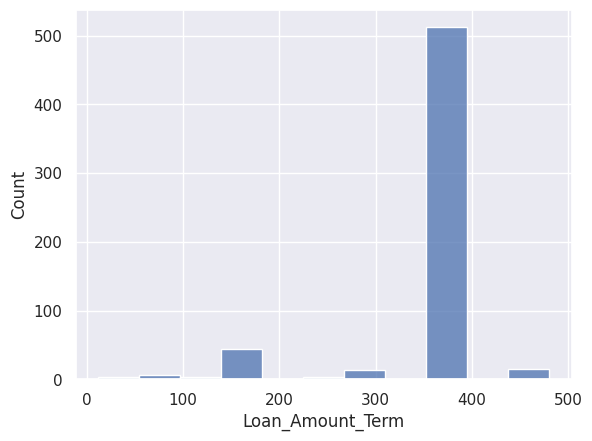

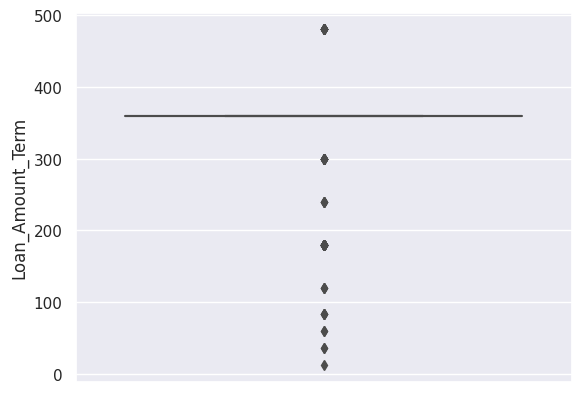

{'missing': 14,
 'min': 12.0,
 'max': 480.0,
 'mean': 342.0,
 'var': 4240.67,
 'std': 65.12,
 'range': 468.0,
 'q1': 360.0,
 'q2': 360.0,
 'q3': 360.0,
 'skewness': -2.36,
 'Kurtosis': 6.67}

In [ ]:
details_num(df, 'Loan_Amount_Term')

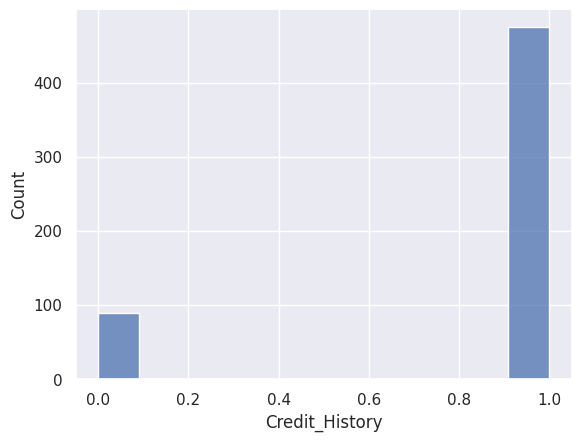

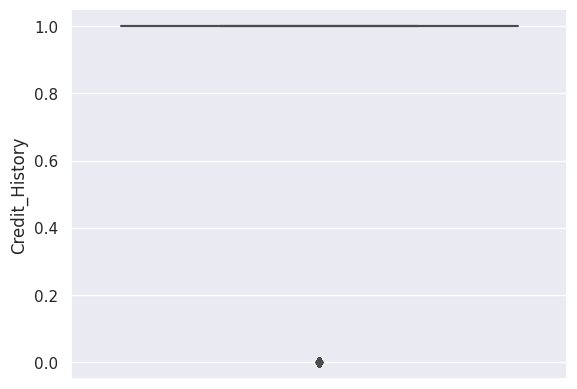

{'missing': 50,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.84,
 'var': 0.13,
 'std': 0.36,
 'range': 1.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': -1.88,
 'Kurtosis': 1.55}

In [ ]:
details_num(df, 'Credit_History')

<Axes: xlabel='Loan_Status'>

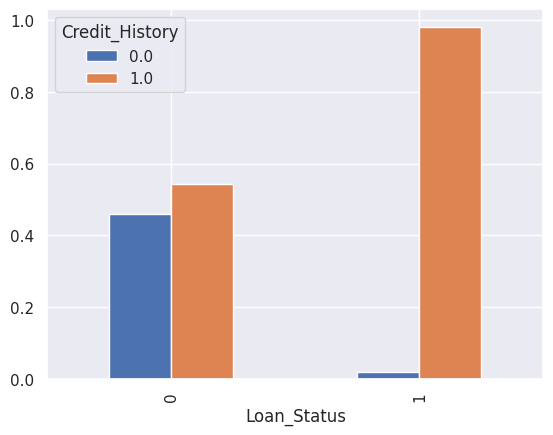

In [ ]:
pd.crosstab(df['Loan_Status'],df['Credit_History'],normalize='index').plot(kind='bar')

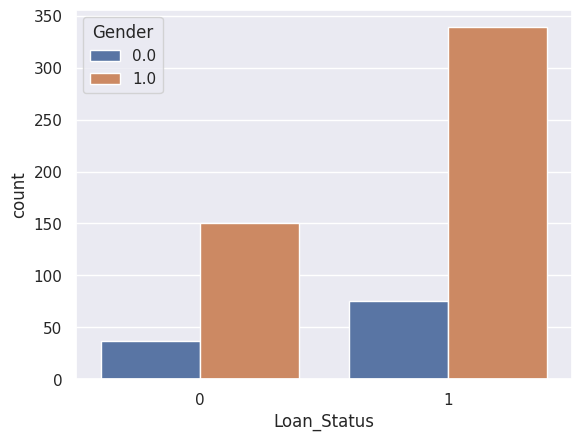

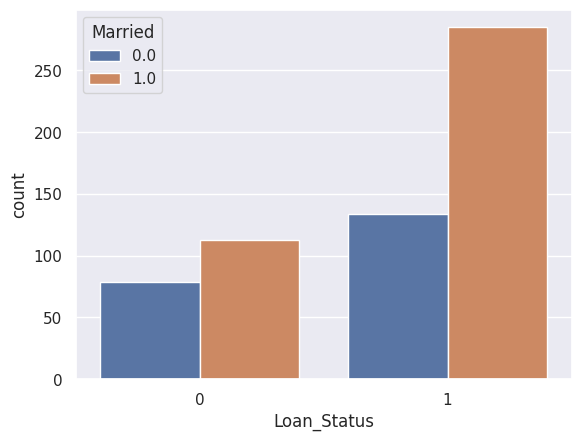

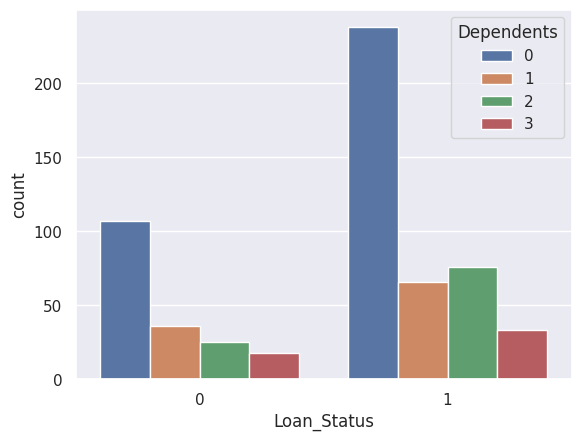

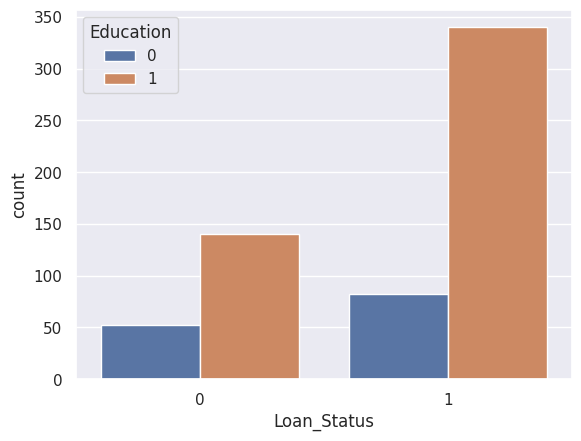

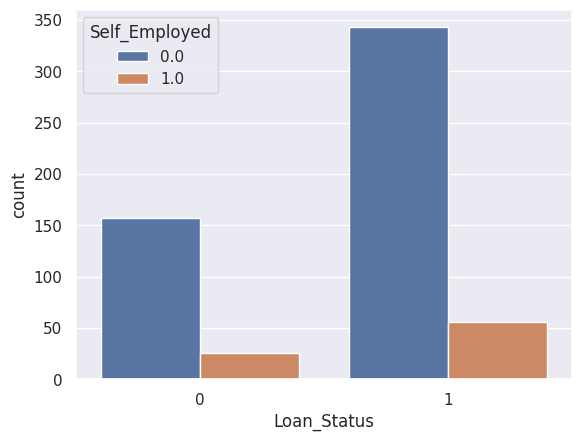

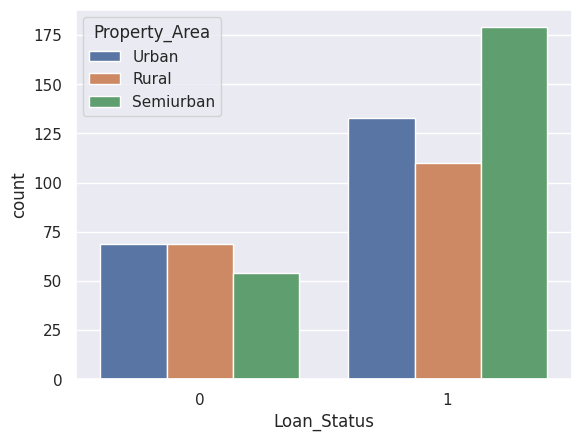

In [ ]:
list1=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
for i in list1:
  sns.countplot(data=df, x='Loan_Status', hue=df[i])
  plt.show()

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

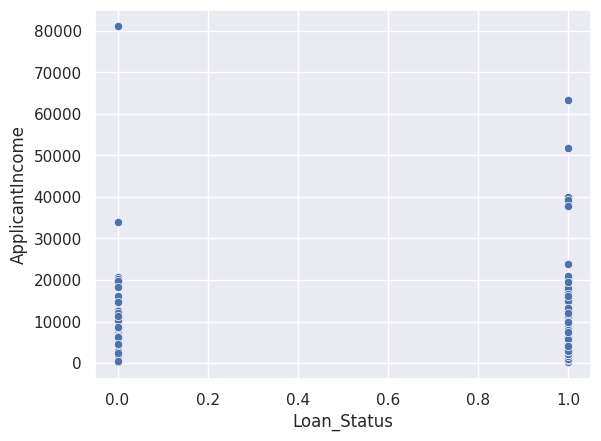

In [ ]:
sns.scatterplot(data=df, x='Loan_Status', y='ApplicantIncome')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

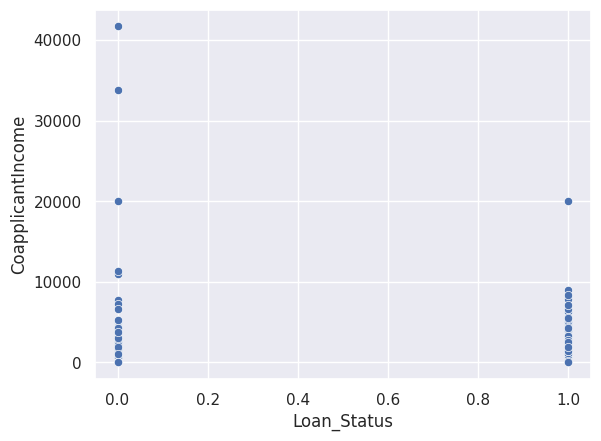

In [ ]:
sns.scatterplot(data=df, x='Loan_Status', y='CoapplicantIncome')

<Axes: xlabel='Dependents'>

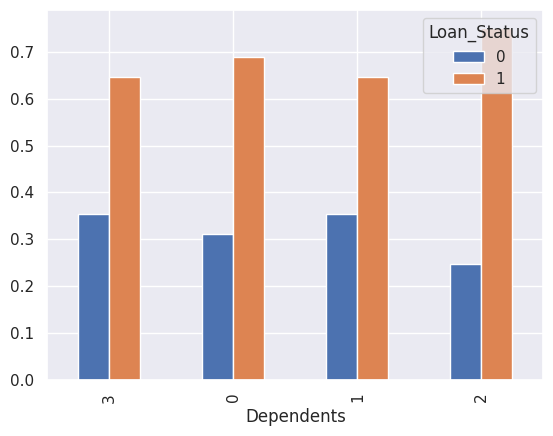

In [ ]:
pd.crosstab(df['Dependents'],df['Loan_Status'],normalize='index').plot(kind='bar')

<Axes: xlabel='Loan_Status'>

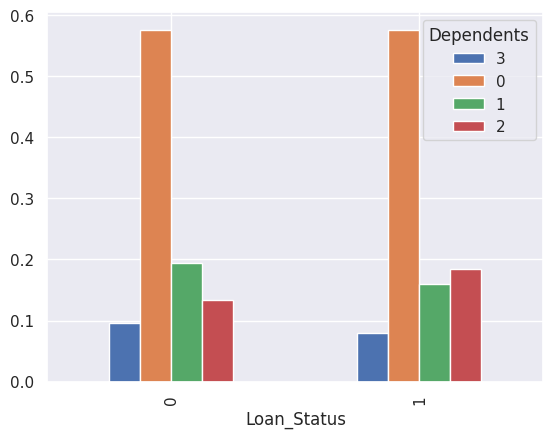

In [ ]:
pd.crosstab(df['Loan_Status'],df['Dependents'],normalize='index').plot(kind='bar')

### Feature Engineering

In [ ]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

<Axes: xlabel='ApplicantIncome', ylabel='total_income'>

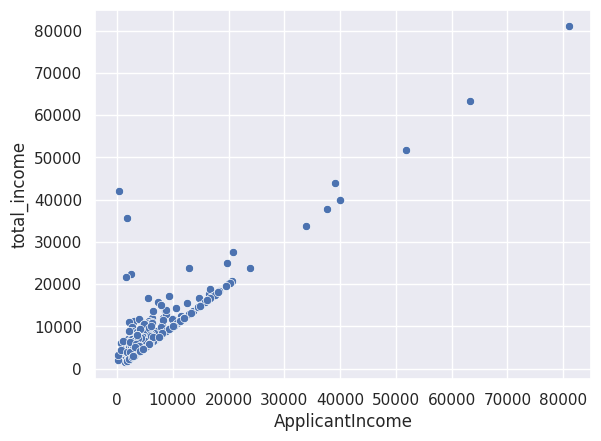

In [ ]:
sns.scatterplot(data=df, x='ApplicantIncome', y='total_income')

Handling Null values

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
total_income          0
dtype: int64

In [ ]:
pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage':round((df.isnull().sum()/df.shape[0]),2)})

,Null Values,Percentage
Gender,13,0.02
Married,3,0.00
Dependents,15,0.02
Education,0,0.00
Self_Employed,32,0.05
ApplicantIncome,0,0.00
CoapplicantIncome,0,0.00
LoanAmount,22,0.04
Loan_Amount_Term,14,0.02
Credit_History,50,0.08


filling mode in place of null values in categorical data

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Dependents']=df['Dependents'].astype('int')

filling median or mode in place of null values in numerical data

In [ ]:
med_data=df.copy()

In [ ]:
med_data['LoanAmountMedian']=med_data['LoanAmount'].fillna(df['LoanAmount'].median())
med_data['LoanAmountMean']=med_data['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
med_data['Loan_Amount_TermMedian']=med_data['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
med_data['Loan_Amount_TermMean']=med_data['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [ ]:
print('Origional Loan Amount', med_data['LoanAmount'].var())
print('Mean Loan Amount', med_data['LoanAmountMean'].var())
print('Median Loan Amount', med_data['LoanAmountMedian'].var())

Origional Loan Amount 7325.190241002422
Mean Loan Amount 7062.295974604293
Median Loan Amount 7074.026706909469


In [ ]:
print('Origional Loan_Amount_Term', med_data['Loan_Amount_Term'].var())
print('Mean Loan_Amount_Term', med_data['Loan_Amount_TermMean'].var())
print('Median Loan_Amount_Termt', med_data['Loan_Amount_TermMedian'].var())

Origional Loan_Amount_Term 4240.667779632721
Mean Loan_Amount_Term 4143.817292006525
Median Loan_Amount_Termt 4151.048243539807


<Axes: ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

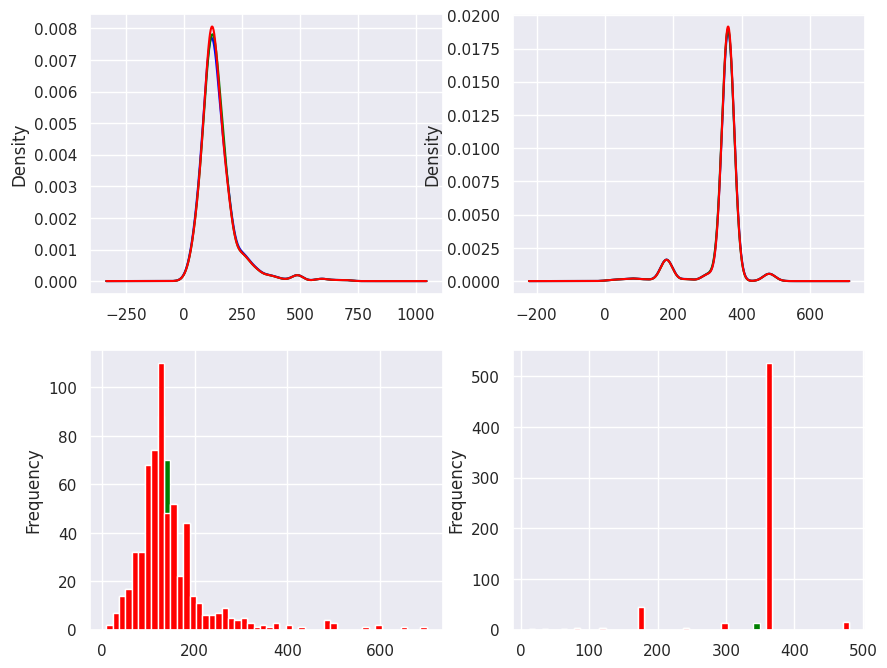

In [ ]:
# Using Density plot from seaborn library
fig=plt.figure()
fig,axs=plt.subplots(2,2, figsize=(10,8))
med_data['LoanAmount'].plot.density(color='blue', ax=axs[0, 0], label='Loan amount')
med_data['LoanAmountMean'].plot.density(color='green', ax=axs[0, 0], label='Loan amount Mean')
med_data['LoanAmountMedian'].plot.density(color='red', ax=axs[0, 0], label='Loan amount Median')
med_data['Loan_Amount_Term'].plot.density(color='blue', ax=axs[0, 1], label='Loan_Amount_Term')
med_data['Loan_Amount_TermMean'].plot.density(color='green', ax=axs[0, 1], label='Loan_Amount_Term Mean')
med_data['Loan_Amount_TermMedian'].plot.density(color='red', ax=axs[0, 1], label='Loan_Amount_Term Median')
med_data['LoanAmount'].plot.hist(bins=50, color='blue', ax=axs[1, 0], label='Loan amount')
med_data['LoanAmountMean'].plot.hist(bins=50, color='green', ax=axs[1, 0], label='Loan amount Mean')
med_data['LoanAmountMedian'].plot.hist(bins=50, color='red', ax=axs[1, 0], label='Loan amount Median')
med_data['Loan_Amount_Term'].plot.hist(bins=50, color='blue', ax=axs[1, 1], label='Loan_Amount_Term')
med_data['Loan_Amount_TermMean'].plot.hist(bins=50, color='green', ax=axs[1, 1], label='Loan_Amount_Term Mean')
med_data['Loan_Amount_TermMedian'].plot.hist(bins=50, color='red', ax=axs[1, 1], label='Loan_Amount_Term Median')

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
dtype: int64

### Handling Outliars

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  total_income       614 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 83.3+ KB


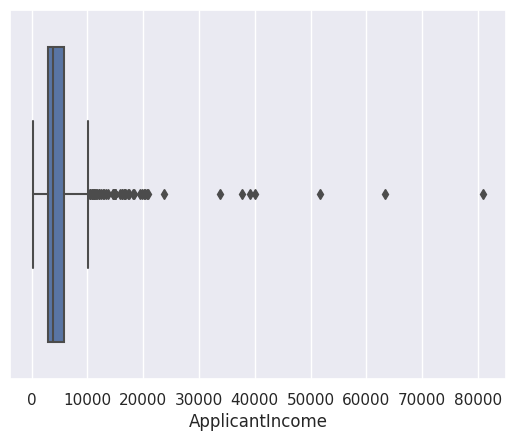

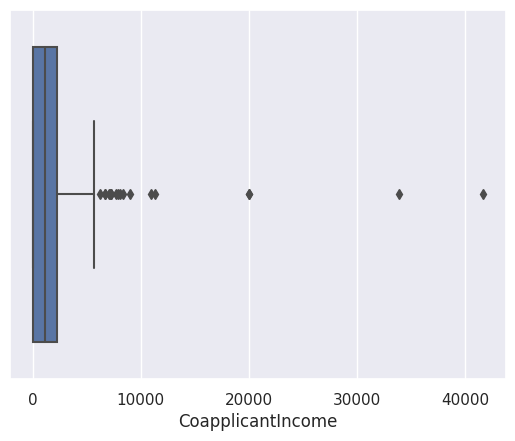

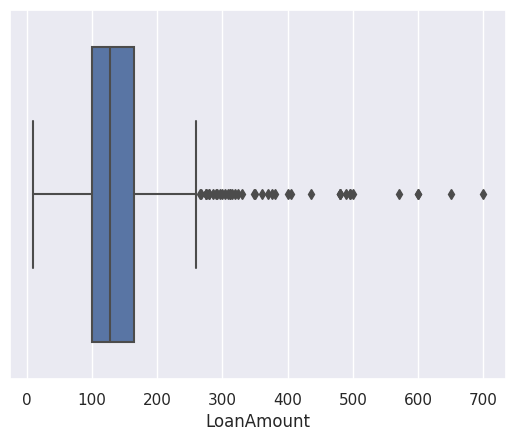

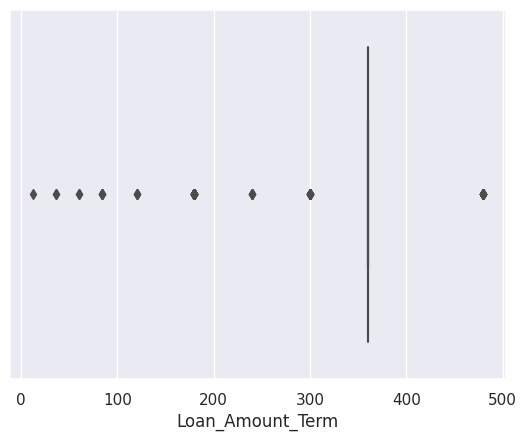

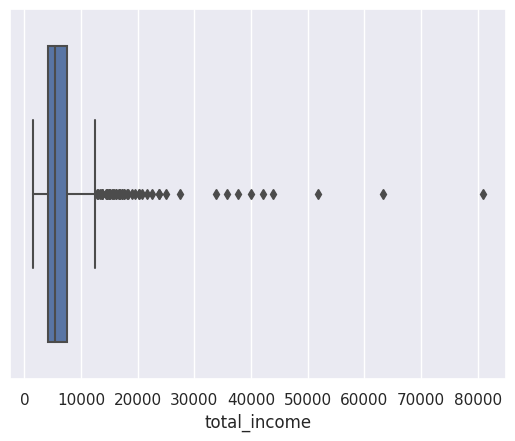

In [ ]:
# checking outliars in all features graphically

l=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'total_income']
for i in l:
  sns.boxplot(data=df, x=df[i])
  plt.show()

In [ ]:
outliars=df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T
outliars

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Gender,614.0,0.817590,0.386497,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,1.00,2.0,3.0,3.00,3.00,3.00,3.00,3.0
Education,614.0,0.781759,0.413389,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.00,1554.12,1800.00,1829.04,1897.55,2216.1,2877.50,3812.5,5795.00,9459.9,14583.0,15364.32,16682.25,19666.04,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1188.5,2297.25,3782.2,4997.4,5397.04,5682.67,7198.56,8895.89,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,30.65,44.00,48.78,54.52,57.30,72.3,100.25,128.0,164.75,229.4,293.4,313.44,356.10,427.94,495.87,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,180.00,180.00,180.00,300.0,360.00,360.0,360.00,360.0,360.0,360.00,360.00,480.00,480.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0


In [ ]:
# removing outliars

def rem_outl(data,col):
  q1=data[col].quantile(.25)
  q3=data[col].quantile(.75)
  lower_cap=q1-1.5*(q3-q1)
  upper_cap=q3+1.5*(q3-q1)
  data[col]=np.where(data[col]>=upper_cap, upper_cap, data[col])
  data[col]=np.where(data[col]<=lower_cap, lower_cap, data[col])
  print('Upper Cap :',upper_cap)
  print('Lower Cap :',lower_cap)

In [ ]:
rem_outl(df, 'ApplicantIncome')

Upper Cap : 10171.25
Lower Cap : -1498.75


In [ ]:
rem_outl(df, 'CoapplicantIncome')

Upper Cap : 5743.125
Lower Cap : -3445.875


In [ ]:
rem_outl(df, 'LoanAmount')

Upper Cap : 261.5
Lower Cap : 3.5


In [ ]:
rem_outl(df, 'Loan_Amount_Term')

Upper Cap : 360.0
Lower Cap : 360.0


In [ ]:
rem_outl(df, 'total_income')

Upper Cap : 12555.375
Lower Cap : -867.625


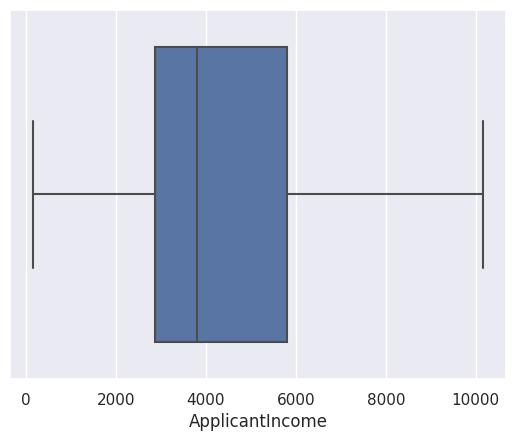

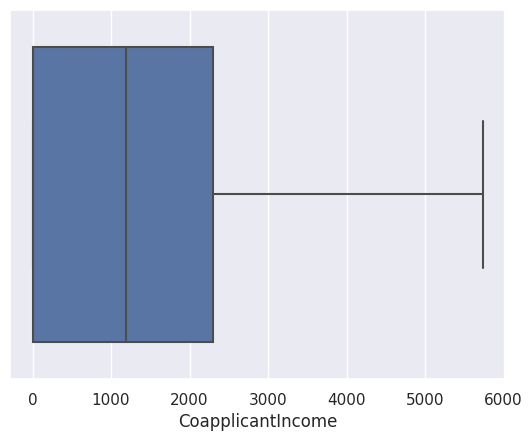

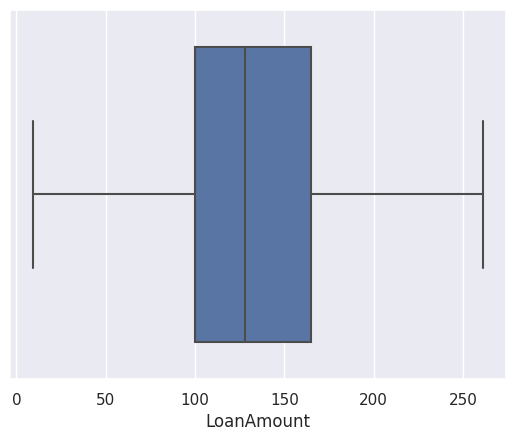

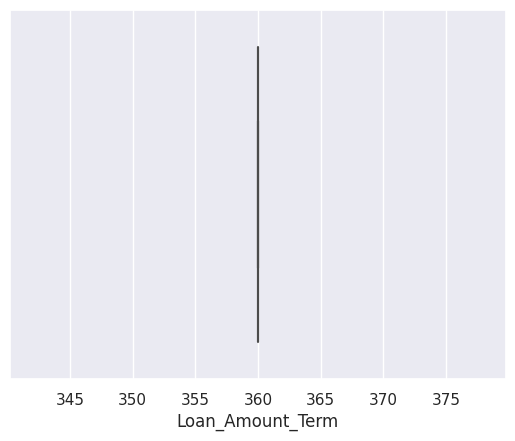

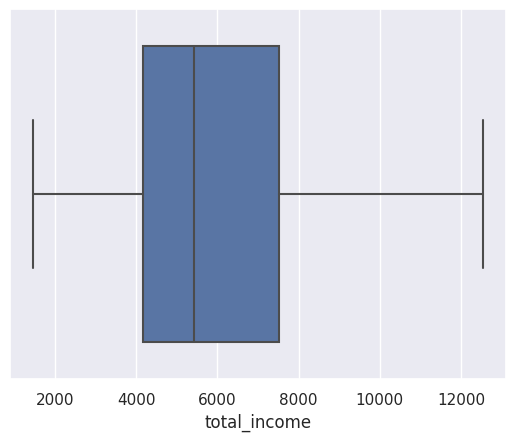

In [ ]:
l=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'total_income']
for i in l:
  sns.boxplot(data=df, x=df[i])
  plt.show()

In [ ]:
med_data.skew()

<ipython-input-68-d91025760f8e>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med_data.skew()


Gender                   -1.648795
Married                  -0.644850
Dependents                1.015551
Education                -1.367622
Self_Employed             2.159796
ApplicantIncome           6.539513
CoapplicantIncome         7.491531
LoanAmount                2.677552
Loan_Amount_Term         -2.362414
Credit_History           -2.021971
Loan_Status              -0.809998
total_income              5.633449
LoanAmountMedian          2.743053
LoanAmountMean            2.726601
Loan_Amount_TermMedian   -2.402112
Loan_Amount_TermMean     -2.389680
dtype: float64

In [ ]:
df.skew()

<ipython-input-69-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.683693
Loan_Amount_Term     0.000000
Credit_History      -2.021971
Loan_Status         -0.809998
total_income         0.942823
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  total_income       614 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 83.3+ KB


In [ ]:
# converting non numeric to numeric feature

df=pd.get_dummies(data=df, drop_first=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001002,1.0,0.0,0,1,0.0,5849.0,0.0,128.0,360.0,1.0,1,5849.0,0,1
LP001003,1.0,1.0,1,1,0.0,4583.0,1508.0,128.0,360.0,1.0,0,6091.0,0,0
LP001005,1.0,1.0,0,1,1.0,3000.0,0.0,66.0,360.0,1.0,1,3000.0,0,1
LP001006,1.0,1.0,0,0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,4941.0,0,1
LP001008,1.0,0.0,0,1,0.0,6000.0,0.0,141.0,360.0,1.0,1,6000.0,0,1


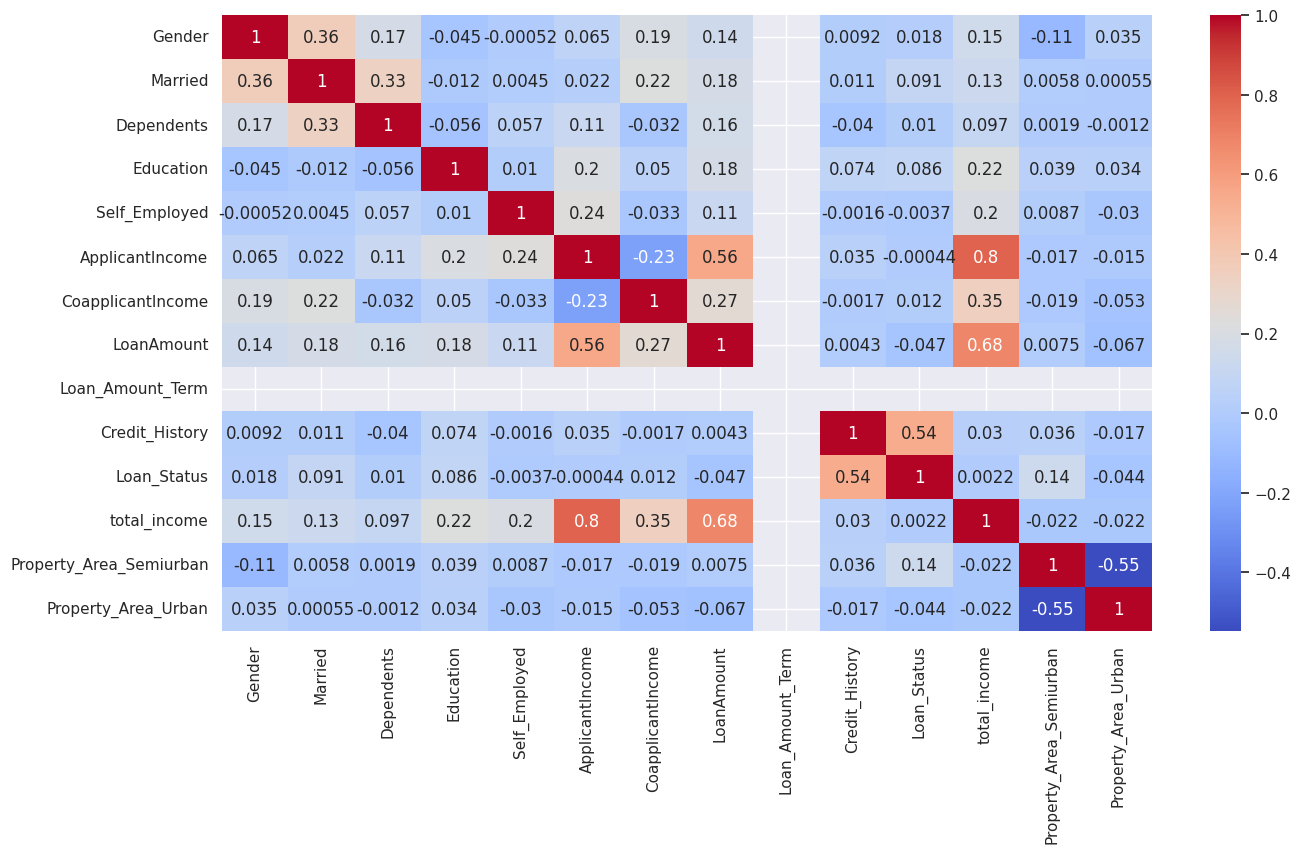

In [ ]:
# Correlation between variables
cor=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=cor, annot=True, cmap='coolwarm')
plt.show()

## Model Development and Deployment

In [ ]:
# importing packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
## assigning features and target variables

# Features
X=df.drop(columns=['Loan_Status'])
# Target Variable
y=df['Loan_Status']

In [ ]:
## Splitting Training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((429, 13), (429,))

In [ ]:
X_test.shape, y_test.shape

((185, 13), (185,))

In [ ]:
## Feature Scaling

std_sc=StandardScaler()
X_train_std=std_sc.fit_transform(X_train)
X_test_std=std_sc.fit_transform(X_test)

In [ ]:
## Logistic Regression

log_regress=LogisticRegression(max_iter=1000)
log_regress.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
## Checkimg the model accuracy

print('Train Accuracy :', log_regress.score(X_train_std, y_train))
print('Test Accuracy :', log_regress.score(X_test_std, y_test))

Train Accuracy : 0.8018648018648019
Test Accuracy : 0.8216216216216217


In [ ]:
# predicting the training and testing data

pred_train = log_regress.predict(X_train_std)
pred_test = log_regress.predict(X_test_std)

<Axes: xlabel='Loan_Status', ylabel='Count'>

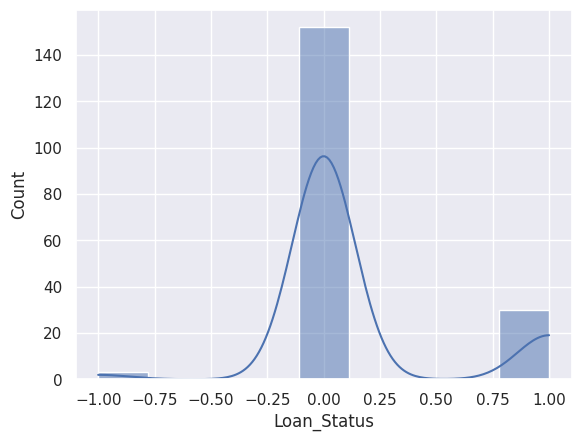

In [ ]:
sns.histplot(pred_test-y_test, kde=True)

In [ ]:
# Accuracy of Logistic Regression

print('The Accuracy of Logistic Regression is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of Logistic Regression is  0.8216216216216217


In [ ]:
# comparing actual test value with predicted test value

act_test_pred=pd.DataFrame({'Act': y_test,'Pred': pred_test})
act_test_pred.sample(10)

,Act,Pred
Loan_ID,,
LP002368,1,1
LP001379,0,0
LP002112,1,1
LP001356,1,1
LP001765,1,1
LP001682,0,1
LP001883,0,1
LP002534,1,0
LP001776,1,1


## Model Evaluation

In [ ]:
# Confusion Matrix

con_test = metrics.confusion_matrix(y_test,pred_test)
con_test

array([[ 21,  30],
       [  3, 131]])

In [ ]:
pd.DataFrame(con_test, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,21,30
Act_1_pos,3,131


In [ ]:
# Classifiation Report

print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



In [ ]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



In [ ]:
# ROC and AUC

fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7076315011820331

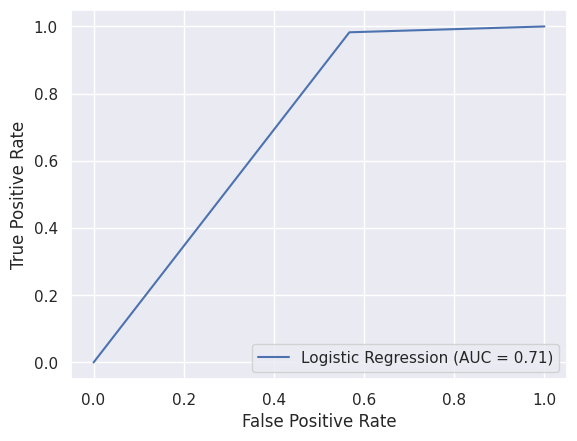

In [ ]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

In [ ]:
# K - NN

knn=KNeighborsClassifier()
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [ ]:
print('Train Accuracy :', knn.score(X_train_std, y_train))
print('Test Accuracy :', knn.score(X_test_std, y_test))

Train Accuracy : 0.8018648018648019
Test Accuracy : 0.7891891891891892


In [ ]:
# Hyperparameter Tuning

k1=[3,5,7,9,11,13,15,17,19,21]
p=[1,2,3]
train=[]
test=[]
for i in k1:
  for j in p:
    knn2=KNeighborsClassifier(n_neighbors=i,p=j)
    knn2.fit(X_train_std,y_train)
    train_ac=knn2.score(X_train_std,y_train)
    test_ac=knn2.score(X_test_std,y_test)
    train.append(train_ac)
    test.append(test_ac)
    print(f'for k = {i} and p = {j}, Train Accuracy = {train_ac} and Test Accuracy = {test_ac}')

for k = 3 and p = 1, Train Accuracy = 0.8228438228438228 and Test Accuracy = 0.8
for k = 3 and p = 2, Train Accuracy = 0.8461538461538461 and Test Accuracy = 0.7567567567567568
for k = 3 and p = 3, Train Accuracy = 0.8391608391608392 and Test Accuracy = 0.7675675675675676
for k = 5 and p = 1, Train Accuracy = 0.8135198135198135 and Test Accuracy = 0.8
for k = 5 and p = 2, Train Accuracy = 0.8018648018648019 and Test Accuracy = 0.7891891891891892
for k = 5 and p = 3, Train Accuracy = 0.8065268065268065 and Test Accuracy = 0.7783783783783784
for k = 7 and p = 1, Train Accuracy = 0.8018648018648019 and Test Accuracy = 0.8108108108108109
for k = 7 and p = 2, Train Accuracy = 0.8088578088578089 and Test Accuracy = 0.8054054054054054
for k = 7 and p = 3, Train Accuracy = 0.8065268065268065 and Test Accuracy = 0.7945945945945946
for k = 9 and p = 1, Train Accuracy = 0.7855477855477856 and Test Accuracy = 0.8
for k = 9 and p = 2, Train Accuracy = 0.8135198135198135 and Test Accuracy = 0.805405

In [ ]:
dfg=[]
for i in k1:
  for j in p:
    l=str(i)+'-'+str(j)
    dfg.append(l)

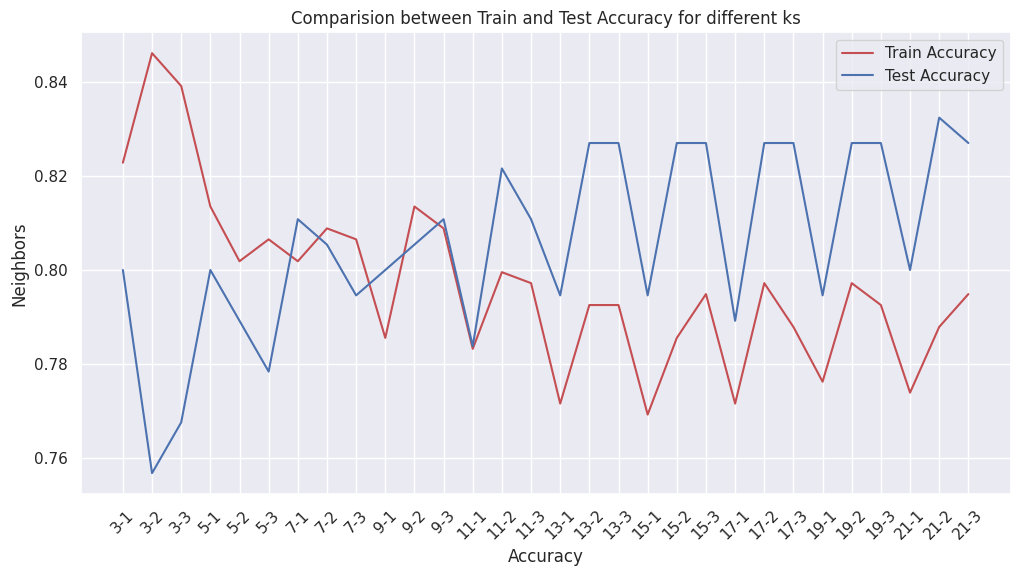

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dfg, train, label='Train Accuracy', color='r')
plt.plot(dfg, test, label='Test Accuracy', color='b')
plt.title('Comparision between Train and Test Accuracy for different ks')
plt.xlabel('Accuracy')
plt.ylabel('Neighbors')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=11, p=1)
knn2.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [ ]:
# Checking the accuracy of the model

print('Train Accuracy :', knn2.score(X_train_std, y_train))
print('Test Accuracy :', knn2.score(X_test_std, y_test))

Train Accuracy : 0.7832167832167832
Test Accuracy : 0.7837837837837838


In [ ]:
# Predicting train and test data results

pred_test=knn2.predict(X_test_std)
pred_train=knn2.predict(X_train_std)

In [ ]:
# Accuracy of KNN Model

print('The Accuracy of K-NN is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of K-NN is  0.7837837837837838


In [ ]:
# Confusion Matrix

cm=metrics.confusion_matrix(y_test, pred_test)
pd.DataFrame(cm, columns=['Pred_Low','Pred_High'], index=['Act_Low','Act_High'])

,Pred_Low,Pred_High
Act_Low,18,33
Act_High,7,127


In [ ]:
# Classification Report

print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55       141
           1       0.77      0.97      0.86       288

    accuracy                           0.78       429
   macro avg       0.82      0.68      0.70       429
weighted avg       0.80      0.78      0.76       429



In [ ]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.72      0.35      0.47        51
           1       0.79      0.95      0.86       134

    accuracy                           0.78       185
   macro avg       0.76      0.65      0.67       185
weighted avg       0.77      0.78      0.76       185



In [ ]:
# ROC and AUC

fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.6846926713947991

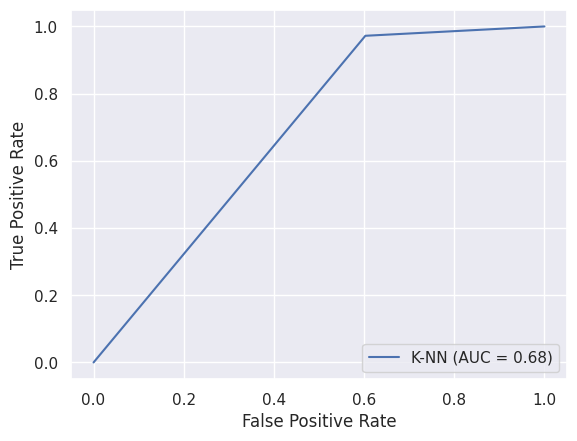

In [ ]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='K-NN')
display.plot()
plt.show()

In [ ]:
# SVM - Support Vector Machines

# Initialling SVM
svm1=svm.LinearSVC()
svm1.fit(X_train_std, y_train)

LinearSVC()

In [ ]:
#checking model accuracy

print('Train Accuracy :', svm1.score(X_train_std, y_train))
print('Test Accuracy :', svm1.score(X_test_std, y_test))

Train Accuracy : 0.8018648018648019
Test Accuracy : 0.827027027027027


In [ ]:
svm2=svm.SVC()
svm2.fit(X_train_std,y_train)

SVC()

In [ ]:
print('Train Accuracy :', svm2.score(X_train_std, y_train))
print('Test Accuracy :', svm2.score(X_test_std, y_test))

Train Accuracy : 0.8088578088578089
Test Accuracy : 0.827027027027027


In [ ]:
# Hyperparameter Tuning

params={'kernel':['linear','poly','rbf'],
'degree': [2,3,4],
'gamma': [0.1, 1, .001],
'C': [0.01,0.1,1,10,100,150]
}
sv=svm.SVC()
svm_rs=GridSearchCV(sv, params, cv=10, n_jobs=-1, verbose=True)
svm_rs.fit(X_train_std,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 150], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [ ]:
svm_rs.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
svm_rs.best_score_

0.8018826135105204

In [ ]:
svm_rs.best_estimator_

SVC(C=0.01, degree=2, gamma=0.1, kernel='linear')

In [ ]:
sv1=svm.SVC(C=0.01, degree=2, gamma=0.1, kernel='linear')
sv1.fit(X_train_std, y_train)
print('Train Accuracy : ', sv1.score(X_train_std,y_train))
print('Test Accuracy : ', sv1.score(X_test_std,y_test))

Train Accuracy :  0.8018648018648019
Test Accuracy :  0.827027027027027


In [ ]:
# Predicting Trian and Test Data

pred_train=sv1.predict(X_train_std)
pred_test=sv1.predict(X_test_std)

In [ ]:
# SVM Model Accuracy

print('The Accuracy of SVM is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of SVM is  0.827027027027027


In [ ]:
# Classification report

print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



In [ ]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [ ]:
# ROC and AUC

fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr) # AUC : Area under the curve
roc_auc

0.7076315011820331

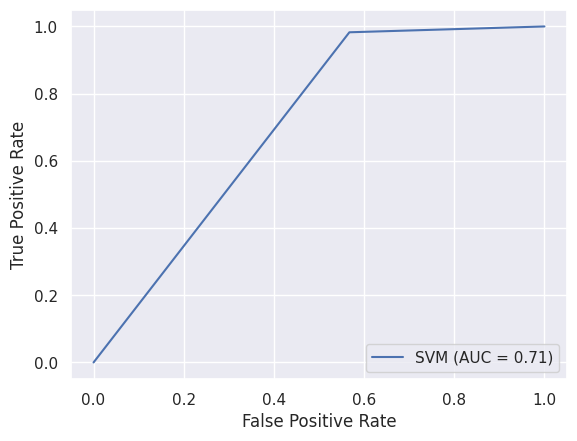

In [ ]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='SVM')
display.plot()
plt.show()

In [ ]:
# Decision Tree Algorithm

dt=DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [ ]:
# Grid Search : Parameter Tuning

params={
'criterion': ['gini','entropy'],
'max_depth': [9,11,13,15],
'min_samples_split': [15,20,50,100,200,250,300],
'min_samples_leaf': [5,10,15,20,50,80,100]}
dtg=DecisionTreeClassifier()
gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)
gd_search.fit(X_train_std, y_train)

Fitting 10 folds for each of 392 candidates, totalling 3920 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 11, 13, 15],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [15, 20, 50, 100, 200, 250, 300]},
             verbose=2)

In [ ]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 250}

In [ ]:
gd_search.best_score_

0.8065337763012183

In [ ]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=250)

In [ ]:
decitr_f=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=250)
decitr_f.fit(X_train_std,y_train)
print('Train Accuracy :', decitr_f.score(X_train_std, y_train))
print('Test Accuracy :', decitr_f.score(X_test_std, y_test))

Train Accuracy : 0.8135198135198135
Test Accuracy : 0.8162162162162162


In [ ]:
# Predicting the Train and Test data result

pred_train=dt_f.predict(X_train_std)
pred_test=dt_f.predict(X_test_std)

NameError: ignored

In [ ]:
# Decision Tree Accuracy

print('The Accuracy of Decision Tree is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of Decision Tree is  0.827027027027027


In [ ]:
# Classification Report

print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



In [ ]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [ ]:
# ROC and AUC

fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr) # AUC : Area under the curve
roc_auc

0.7076315011820331

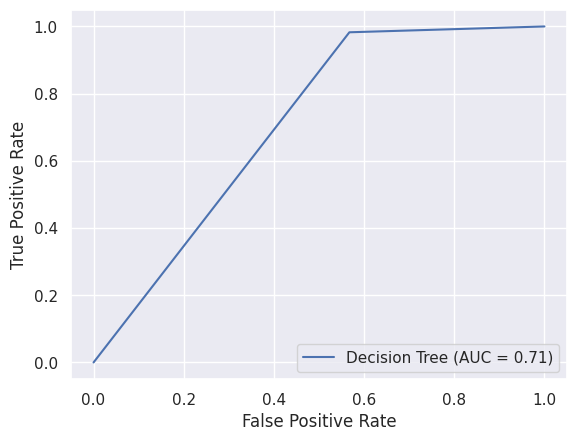

In [ ]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.show()

In [ ]:
# Random Forest

rf=RandomForestClassifier()
rf.fit(X_train_std,y_train)

RandomForestClassifier()

In [ ]:
# Checking the accuracy of the model

print('Train Accuracy :', rf.score(X_train_std, y_train))
print('Test Accuracy :', rf.score(X_test_std, y_test))

Train Accuracy : 1.0
Test Accuracy : 0.8


In [ ]:
# Hyperparameter Tuning

params={'n_estimators':[100,150,200],
'criterion': ['gini','entropy'],
'max_depth': [9,11,13,15],
'min_samples_split': [50,100,200],
'min_samples_leaf': [5,10,15,20],
'max_features':['sqrt','log2'],
'bootstrap':[True]
}
rf1=RandomForestClassifier()
gs_rf=GridSearchCV(estimator=rf1, param_grid=params, cv=10, n_jobs=-1,verbose=1)
gs_rf.fit(X_train_std,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 11, 13, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [140]:
gs_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 150}

In [141]:
gs_rf.best_score_

0.8135105204872646

In [142]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='log2',
                       min_samples_leaf=5, min_samples_split=50,
                       n_estimators=150)

In [143]:
rff=RandomForestClassifier(n_estimators=200, max_depth=9, max_features='log2', min_samples_leaf=5,
min_samples_split=50)
rff.fit(X_train_std,y_train)
print('Train Accuracy :', rff.score(X_train_std, y_train))
print('Test Accuracy :', rff.score(X_test_std, y_test))

Train Accuracy : 0.8135198135198135
Test Accuracy : 0.8162162162162162


In [144]:
# Predicting Train and test result

pred_train=rff.predict(X_train_std)
pred_test=rff.predict(X_test_std)

In [146]:
# Checking model accuracy

print('The Accuracy of Random Forest is ',metrics.accuracy_score(pred_test,y_test))

The Accuracy of Random Forest is  0.8162162162162162


In [147]:
# Classification Report

print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63       141
           1       0.79      0.98      0.88       288

    accuracy                           0.81       429
   macro avg       0.85      0.73      0.75       429
weighted avg       0.83      0.81      0.79       429



In [148]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.41      0.55        51
           1       0.81      0.97      0.88       134

    accuracy                           0.82       185
   macro avg       0.83      0.69      0.72       185
weighted avg       0.82      0.82      0.79       185



In [149]:
# ROC and AUC

fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr) # AUC : Area under the curve
roc_auc

0.7271719858156027

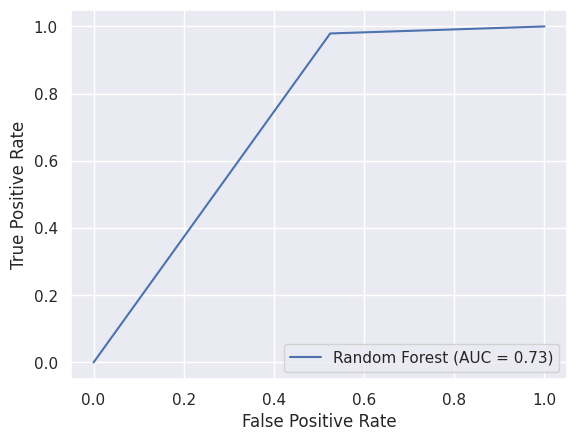

In [150]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.show()